In [71]:
import xarray as xr
import ecmwflibs
from cfgrib.xarray_store import open_dataset
import numpy as np
import os
import pandas as pd

In [113]:
from typing import List
txt = str("filter_by_keys={'typeOfLevel': 'meanSea'}\n    filter_by_keys={'typeOfLevel': 'hybrid'}\n    filter_by_keys={'typeOfLevel': 'atmosphere'}\n    filter_by_keys={'typeOfLevel': 'surface'}\n    filter_by_keys={'typeOfLevel': 'planetaryBoundaryLayer'}\n    filter_by_keys={'typeOfLevel': 'isobaricInPa'}\n    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGround'}\n    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}\n    filter_by_keys={'typeOfLevel': 'heightAboveSea'}\n    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}\n    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'highCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'cloudCeiling'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'tropopause'}\n    filter_by_keys={'typeOfLevel': 'maxWind'}\n    filter_by_keys={'typeOfLevel': 'isothermZero'}\n    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}\n    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'sigmaLayer'}\n    filter_by_keys={'typeOfLevel': 'sigma'}\n    filter_by_keys={'typeOfLevel': 'potentialVorticity'}")

def cls_txt(det: str):

    

    det = det.lower()
    det = det.replace("=", "")
    det = det.replace("{", "")
    det = det.replace("}", "")
    det = det.replace("\n", "")
    det = det.replace(":", "")
    det = det.replace("'", "")
    det = det.replace("  ", " ")
    det = det.replace("filter_by_keys", "")
    det = det.replace("typeoflevel", "")
    det = det.replace("  ", "")
    det = det.lstrip()
    det = det.rstrip()
    det = det
    
    det = det.replace(" ", ", ")
    return det

txt2 = cls_txt(txt)
txt2

'meansea, hybrid, atmosphere, surface, planetaryboundarylayer, isobaricinpa, isobaricinhpa, heightaboveground, depthbelowlandlayer, heightabovesea, atmospheresinglelayer, lowcloudlayer, middlecloudlayer, highcloudlayer, cloudceiling, heightabovegroundlayer, tropopause, maxwind, isothermzero, highesttroposphericfreezing, pressurefromgroundlayer, sigmalayer, sigma, potentialvorticity'

In [143]:
perams = []
txt3 = txt2.split(',')  # Split txt2 outside the loop
for n in range(len(txt3)):
    txt3[n] = txt3[n].lstrip()  # Corrected: Assign back the stripped string
    perams.append(txt3[n])  # Corrected: Append the stripped string to perams

perams.remove('hybrid')
perams

['meansea',
 'atmosphere',
 'surface',
 'planetaryboundarylayer',
 'isobaricinpa',
 'isobaricinhpa',
 'heightaboveground',
 'depthbelowlandlayer',
 'heightabovesea',
 'atmospheresinglelayer',
 'lowcloudlayer',
 'middlecloudlayer',
 'highcloudlayer',
 'cloudceiling',
 'heightabovegroundlayer',
 'tropopause',
 'maxwind',
 'isothermzero',
 'highesttroposphericfreezing',
 'pressurefromgroundlayer',
 'sigmalayer',
 'sigma',
 'potentialvorticity']

In [163]:
len(perams)

23

In [165]:
grib_file = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS\gfs_4_20231017_0000_000.grb2"

# Open the GRIB2 file using xarray
# ds = xr.open_dataset(grib_file, engine='cfgrib')

ini_ds = open_dataset(grib_file, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': perams[13]}}, decode_cf=True)
ini_ds
# ds

Ignoring index file 'C:\\Projs\\COde\\Earthquake\\earthquake-prediction\\data\\GFS\\gfs_4_20231017_0000_000.grb2.9093e.idx' incompatible with GRIB file


<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.7
    history:      2024-04-18T14:26 GRIB to CDM+CF via cfgrib-0.9.11.0/ecCodes...

In [166]:
ini_ds.data_vars

Data variables:
    *empty*

In [91]:
ini_ds['tcc'].values

NameError: name 'ini_ds' is not defined

In [56]:
latt = 22.71
lonn = 77.41

bpl_data = ini_ds.sel(latitude=latt, longitude=lonn, method='nearest')

In [63]:
bpl_data.variables

Frozen({'time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time, 'step': <xarray.Variable ()> Size: 8B
[1 values with dtype=timedelta64[ns]]
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period, 'atmosphere': <xarray.Variable ()> Size: 8B
[1 values with dtype=float64]
Attributes:
    long_name:  original GRIB coordinate for key: level(atmosphere)
    units:      1, 'latitude': <xarray.Variable ()> Size: 8B
array(22.5)
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing, 'longitude': <xarray.Variable ()> Size: 8B
array(77.5)
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude, 'valid_time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Attributes:
    st

In [60]:
list(bpl_data.data_vars)

['refc', 'tcc']

In [14]:
reflek = float(bpl_data['refc'].values)
total_cc = float(bpl_data['tcc'].values)
print(reflek, total_cc)


-20.000003814697266 1.100000023841858


---

# Using IMD Dataset (Legacy)

In [53]:
# Using IMDLIB #

import imdlib as imd

In [54]:
start_yr = 2022
end_yr = 2023
variable = 'rain' # other options are ('tmin'/ 'tmax')
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise')

Downloading: rain for year 2022
Downloading: rain for year 2023


KeyboardInterrupt: 

In [56]:
start_yr = 2022
end_yr = 2023
variable = 'rain' # other options are ('tmin'/ 'tmax')
file_dir = 'C:/Projs/COde/Earthquake/earthquake-prediction/rain' #Path to save the files
data = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)
data

In [57]:
ds = data.get_xarray()
ds

<xarray.Dataset> Size: 102MB
Dimensions:  (time: 730, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 6kB 2022-01-01 2022-01-02 ... 2023-12-31
Data variables:
    rain     (time, lat, lon) float64 102MB -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-04-15 08:25:17.480599 Python
    references:   
    comment:      
    crs:          epsg:4326

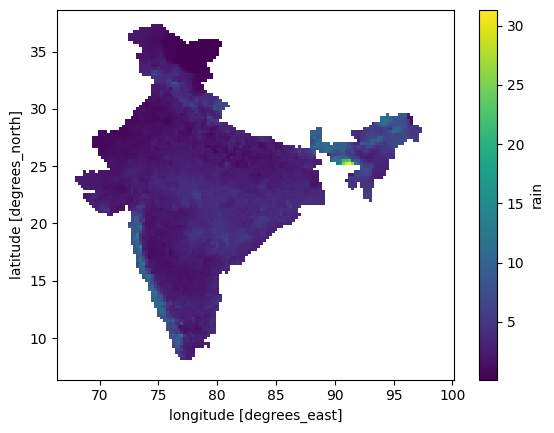

In [58]:
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()

In [76]:
df = ds.to_dataframe()
df

rain
time       lat  lon         
2022-01-01 6.5  66.50    NaN
                66.75    NaN
                67.00    NaN
                67.25    NaN
                67.50    NaN
...                      ...
2023-12-31 38.5 99.00    NaN
                99.25    NaN
                99.50    NaN
                99.75    NaN
                100.00   NaN

[12712950 rows x 1 columns]

In [77]:
df.rain.unique()

array([       nan, 0.        , 5.0996213 , ..., 0.02632885, 0.39881554,
       0.21188194])

In [78]:
df['rain'] = df['rain'].map({np.nan: 0}) 

In [79]:
df

rain
time       lat  lon         
2022-01-01 6.5  66.50    0.0
                66.75    0.0
                67.00    0.0
                67.25    0.0
                67.50    0.0
...                      ...
2023-12-31 38.5 99.00    0.0
                99.25    0.0
                99.50    0.0
                99.75    0.0
                100.00   0.0

[12712950 rows x 1 columns]

In [ ]:
new_df = df.loc['']

In [80]:
df.index

MultiIndex([('2022-01-01',  6.5,  66.5),
            ('2022-01-01',  6.5, 66.75),
            ('2022-01-01',  6.5,  67.0),
            ('2022-01-01',  6.5, 67.25),
            ('2022-01-01',  6.5,  67.5),
            ('2022-01-01',  6.5, 67.75),
            ('2022-01-01',  6.5,  68.0),
            ('2022-01-01',  6.5, 68.25),
            ('2022-01-01',  6.5,  68.5),
            ('2022-01-01',  6.5, 68.75),
            ...
            ('2023-12-31', 38.5, 97.75),
            ('2023-12-31', 38.5,  98.0),
            ('2023-12-31', 38.5, 98.25),
            ('2023-12-31', 38.5,  98.5),
            ('2023-12-31', 38.5, 98.75),
            ('2023-12-31', 38.5,  99.0),
            ('2023-12-31', 38.5, 99.25),
            ('2023-12-31', 38.5,  99.5),
            ('2023-12-31', 38.5, 99.75),
            ('2023-12-31', 38.5, 100.0)],
           names=['time', 'lat', 'lon'], length=12712950)

In [81]:
df = df.reset_index()

In [83]:
df

time   lat     lon  rain
0        2022-01-01   6.5   66.50   0.0
1        2022-01-01   6.5   66.75   0.0
2        2022-01-01   6.5   67.00   0.0
3        2022-01-01   6.5   67.25   0.0
4        2022-01-01   6.5   67.50   0.0
...             ...   ...     ...   ...
12712945 2023-12-31  38.5   99.00   0.0
12712946 2023-12-31  38.5   99.25   0.0
12712947 2023-12-31  38.5   99.50   0.0
12712948 2023-12-31  38.5   99.75   0.0
12712949 2023-12-31  38.5  100.00   0.0

[12712950 rows x 4 columns]

In [51]:
new_df = [(df.loc['lat'] == 22.77)]

NameError: name 'df' is not defined

---

# Multivariate TimeSeries Forescating

In [174]:
dat_path = r'C:\Users\Rishi\Dropbox\final_dataa.csv'

'c:\\Projs\\COde\\Meteo\\MetP\\data'

---

# Final Testing

In [ ]:
import xarray as xr
import ecmwflibs
from cfgrib.xarray_store import open_dataset
import numpy as np
import os
import pandas as pd

def loc_data(data_set, lats, lons) :
    return data_set.sel(latitude=lats, longitude=lons, method='nearest')

### GFS DATA CURATION AND PREPROCESSING ###
data_path = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS"

def wrf_prep_fn(pats):
    for root, dirs, files in os.walk(pats):
        for f in files:
            if f.endswith('.grb2'):
                f_pt = os.path.join(root, f)
                ini_ds = xr.open_dataset(f_pt, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'atmosphere'}}, decode_cf=True)

                var_nams = list(loc_data(ini_ds, 22.71, 77.41).data_vars)

                init_df = pd.DataFrame({})
                
                vals = []

                for var_name in var_nams:  # Loop through variable names
                    
                    data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values
                    print(f"{var_name}: {data_value}")
                    init_df[var_name] = ''  # Use variable name as column name
                    vals.append(data_value)

                init_df.loc[len(init_df)] = vals
                    # init_df = init_df.append(pd.Series({var_name: data_value}, name=var_name), ignore_index=True)
                # for var_name in var_nams:
                #     # Access data from ini_ds using variable name
                #     data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values  # Get data value (assuming single value)

                #     # Check dimensionality (assuming you only need the first value)
                #     # if data_value.ndim > 0:
                #     #     data_value = data_value.values[0]  # Access first element if multi-dimensional

                #     # # Append data as a Series (single row)
                    # init_df = init_df.append(pd.Series({var_name: data_value}, name=var_name), ignore_index=True)
        # return init_df

wrf_prep_fn(data_path)

In [110]:
txt2

['meansea, hybrid, atmosphere, surface, planetaryboundarylayer, isobaricinpa, isobaricinhpa, heightaboveground, depthbelowlandlayer, heightabovesea, atmospheresinglelayer, lowcloudlayer, middlecloudlayer, highcloudlayer, cloudceiling, heightabovegroundlayer, tropopause, maxwind, isothermzero, highesttroposphericfreezing, pressurefromgroundlayer, sigmalayer, sigma, potentialvorticity']

In [168]:
### GFS DATA CURATION AND PREPROCESSING ###
data_path = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS"


def wrf_prep_fn(pats, key_params):
    """
    
    """
    for root, dirs, files in os.walk(pats):
        for f in files:
            try:
                if f.endswith('.grb2'):
                    for key_param in perams:
                        try:
                            f_pt = os.path.join(root, f)
                            ini_ds = open_dataset(f_pt, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface'}}, decode_cf=True)
                            var_nams = list(loc_data(ini_ds, 22.71, 77.41).data_vars)

                            init_df = pd.DataFrame()
                            vals = []

                            for var_name in var_nams:  # Loop through variable names
                                
                                data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values
                                print(f"{var_name}: {data_value}")
                                init_df[var_name] = ''  # Use variable name as column name

                                vals.append(data_value)

                            init_df.loc[len(init_df)] = vals
                            ini_ds.close()
                            return init_df
                        except Exception as e:
                            print(f"{e}: Error opening the dataset file, probably hte required file format is not present.")
            except FileNotFoundError as e:
                print(f"{e}: Gridded Dataset File Not found, consider checking he directory.")

            # return data_value
            

dpfs = wrf_prep_fn(data_path, txt2)

Ignoring index file 'C:\\Projs\\COde\\Earthquake\\earthquake-prediction\\data\\GFS\\gfs_4_20231017_0000_000.grb2.9093e.idx' incompatible with GRIB file


vis: 24135.0078125
gust: 0.7775905728340149
hindex: 4.0
sp: 97610.2421875
orog: 324.6993713378906
t: 291.9242248535156
fco2rec: 0.23800000548362732
sdwe: 0.0
sde: 0.0
unknown: 0.0
cpofp: -50.00000762939453
prate: 0.0
csnow: 0.0
cicep: 0.0
cfrzr: 0.0
crain: 0.0
fsr: 0.13000009953975677
fricv: 0.06633544713258743
veg: 57.599998474121094
slt: 12.0
wilt: 0.13519999384880066
fldcp: 0.38909998536109924
SUNSD: 0.0
lftx: 1.503596544265747
cape: 136.0
cin: -180.1315460205078
4lftx: 0.5112884640693665
lsm: 1.0
siconc: 0.0
sit: nan


In [169]:
dpfs


vis       gust hindex        sp       orog          t fco2rec sdwe  \
0  24135.008  0.7775906    4.0  97610.24  324.69937  291.92422   0.238  0.0   

   sde unknown  ...    wilt   fldcp SUNSD       lftx   cape         cin  \
0  0.0     0.0  ...  0.1352  0.3891   0.0  1.5035965  136.0  -180.13155   

        4lftx  lsm siconc  sit  
0  0.51128846  1.0    0.0  nan  

[1 rows x 30 columns]

In [117]:
### IMD DATA CURATION ###

def get_Data(start_year, end_year, var, imd_dat):
    return imd_dat.get_data(var, start_year, end_year, fn_format='yearwise')

In [120]:
def load_Data(file_dir, start_year, end_year, var, imd_dat) -> pd.DataFrame:
    ds = imd_dat.open_data(var, start_year, end_year, 'yearwise', file_dir)
    ds = ds.get_xarray()
    return ds.to_dataframe()

In [2]:
import imdlib as imd

In [6]:
start_dy = '2024-04-10'
end_dy = '2024-04-15'
var_type = 'rain'
file_dir='C:/Projs/COde/Meteo/MetP/data'
data = imd.get_real_data(var_type, start_dy, end_dy, file_dir)

Downloading: rain for date 2024-04-10
Downloading: rain for date 2024-04-11
Downloading: rain for date 2024-04-12
Downloading: rain for date 2024-04-13
Downloading: rain for date 2024-04-14
Downloading: rain for date 2024-04-15
Download Successful !!!


In [7]:
data2 = imd.open_real_data(var_type, start_dy, end_dy, file_dir)
data2

In [9]:
ds2 = data2.get_xarray()
ds2

<xarray.Dataset> Size: 838kB
Dimensions:  (time: 6, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 48B 2024-04-10 2024-04-11 ... 2024-04-15
Data variables:
    rain     (time, lat, lon) float64 836kB -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-04-16 06:55:45.200430 Python
    references:   
    comment:      
    crs:          epsg:4326

In [10]:
rt_df = ds2.to_dataframe()
rt_df

rain
time       lat  lon          
2024-04-10 6.5  66.50  -999.0
                66.75  -999.0
                67.00  -999.0
                67.25  -999.0
                67.50  -999.0
...                       ...
2024-04-15 38.5 99.00  -999.0
                99.25  -999.0
                99.50  -999.0
                99.75  -999.0
                100.00 -999.0

[104490 rows x 1 columns]

In [14]:
import numpy as np

rt_df['rain'] = rt_df['rain'].map({np.nan: 0}) 

In [15]:
rt_df

rain
time       lat  lon         
2024-04-10 6.5  66.50      0
                66.75      0
                67.00      0
                67.25      0
                67.50      0
...                      ...
2024-04-15 38.5 99.00      0
                99.25      0
                99.50      0
                99.75      0
                100.00     0

[104490 rows x 1 columns]

In [17]:
rt_df = rt_df.reset_index()

In [18]:
rt_df

time   lat     lon  rain
0      2024-04-10   6.5   66.50     0
1      2024-04-10   6.5   66.75     0
2      2024-04-10   6.5   67.00     0
3      2024-04-10   6.5   67.25     0
4      2024-04-10   6.5   67.50     0
...           ...   ...     ...   ...
104485 2024-04-15  38.5   99.00     0
104486 2024-04-15  38.5   99.25     0
104487 2024-04-15  38.5   99.50     0
104488 2024-04-15  38.5   99.75     0
104489 2024-04-15  38.5  100.00     0

[104490 rows x 4 columns]

In [40]:
n_r = rt_df.loc[rt_df['lon'] == 72]

In [27]:
n_r

Empty DataFrame
Columns: [time, lat, lon, rain]
Index: []

In [29]:
from helpers import distance

x
rt_df['distance_from_bpl'] = rt_df.apply(lambda row: distance(row['lat'], 23.15, row['lon'], 77.24), axis=1)  

In [30]:
rt_df

time   lat     lon  rain  distance_from_bpl
0      2024-04-10   6.5   66.50     0        2179.184764
1      2024-04-10   6.5   66.75     0        2165.194280
2      2024-04-10   6.5   67.00     0        2151.445254
3      2024-04-10   6.5   67.25     0        2137.942363
4      2024-04-10   6.5   67.50     0        2124.690317
...           ...   ...     ...   ...                ...
104485 2024-04-15  38.5   99.00     0        2676.394259
104486 2024-04-15  38.5   99.25     0        2694.618183
104487 2024-04-15  38.5   99.50     0        2712.922931
104488 2024-04-15  38.5   99.75     0        2731.306783
104489 2024-04-15  38.5  100.00     0        2749.768052

[104490 rows x 5 columns]

In [32]:
sort_df = rt_df.sort_values(by='distance_from_bpl')
sort_df

time    lat     lon  rain  distance_from_bpl
26503 2024-04-11  23.25   77.25     0          11.166363
43918 2024-04-12  23.25   77.25     0          11.166363
78748 2024-04-14  23.25   77.25     0          11.166363
96163 2024-04-15  23.25   77.25     0          11.166363
9088  2024-04-10  23.25   77.25     0          11.166363
...          ...    ...     ...   ...                ...
134   2024-04-10   6.50  100.00     0        3058.885855
17549 2024-04-11   6.50  100.00     0        3058.885855
52379 2024-04-13   6.50  100.00     0        3058.885855
69794 2024-04-14   6.50  100.00     0        3058.885855
34964 2024-04-12   6.50  100.00     0        3058.885855

[104490 rows x 5 columns]

In [38]:
filt_bpl_df = rt_df.loc[rt_df['distance_from_bpl'] < 20]
filt_bpl_df

time    lat    lon  rain  distance_from_bpl
8953  2024-04-10  23.00  77.25     0          16.710581
9088  2024-04-10  23.25  77.25     0          11.166363
26368 2024-04-11  23.00  77.25     0          16.710581
26503 2024-04-11  23.25  77.25     0          11.166363
43783 2024-04-12  23.00  77.25     0          16.710581
43918 2024-04-12  23.25  77.25     0          11.166363
61198 2024-04-13  23.00  77.25     0          16.710581
61333 2024-04-13  23.25  77.25     0          11.166363
78613 2024-04-14  23.00  77.25     0          16.710581
78748 2024-04-14  23.25  77.25     0          11.166363
96028 2024-04-15  23.00  77.25     0          16.710581
96163 2024-04-15  23.25  77.25     0          11.166363

In [39]:
filt_bpl_df = filt_bpl_df.sort_values(by=['distance_from_bpl', 'time'])
filt_bpl_df

time    lat    lon  rain  distance_from_bpl
9088  2024-04-10  23.25  77.25     0          11.166363
26503 2024-04-11  23.25  77.25     0          11.166363
43918 2024-04-12  23.25  77.25     0          11.166363
61333 2024-04-13  23.25  77.25     0          11.166363
78748 2024-04-14  23.25  77.25     0          11.166363
96163 2024-04-15  23.25  77.25     0          11.166363
8953  2024-04-10  23.00  77.25     0          16.710581
26368 2024-04-11  23.00  77.25     0          16.710581
43783 2024-04-12  23.00  77.25     0          16.710581
61198 2024-04-13  23.00  77.25     0          16.710581
78613 2024-04-14  23.00  77.25     0          16.710581
96028 2024-04-15  23.00  77.25     0          16.710581

In [ ]:
def 